## KIDNEY HEALTH PREDICTION

This notebook aims to explore the following kaggle dataset:

  link > "https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone"

and use **Transfer Learning** to predict if a CT kidney scan is either

* Normal
* contains a stone
* contains a Cyst
* contains a Tumor


Let's get into it

In [1]:
# check gpu

!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c157d332-c91f-c126-a5fb-47c8c87fe311)


### Loading in our dataset from Kaggle.🦆

To load in our dataset from kaggle, we must first import our kaggle **API**. To generate our kaggle API, proceed to the kaggle settings section on your kaggle home page and click download API key. Once downloaded run the following on google colab:

      from google.colab import files
      files.upload() # upload kaggle file to colab
      # Make Kaggle directory in root
      !mkdir ~/.kaggle/
      # Move kaggle API key to root directory
      !cp kaggle.json ~/.kaggle/
      # Grant kaggle some permissions
      !chmod 600 ~/.kaggle/kaggle.json

In [2]:
from google.colab import files

files.upload()

!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



Saving kaggle.json to kaggle.json


time to load in our dataset using it's kaggle API command

  command🔑: kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

In [3]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone


# unzipping

!unzip ct-kidney-dataset-normal-cyst-tumor-and-stone.zip

Streaming output truncated to the last 5000 lines.
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4363).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4364).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4365).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4366).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4367).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4368).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4369).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-N

### Time to do some exploration🔭

Let's find out what we're working with. We will figure out data like shape, features and labels

In [22]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
import os

data_path = "/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"

# function for displaying directories in data path
def walkmethrough(path):
  """
  Walk through of the Dataset path, Diplays number of files in each directories in  dataset
  Args:
    path(str): Path of the data
  """
  for(root, dirs, files) in os.walk(path, topdown=True):
    print(f"There are {len(files)} files in {root}")

# get class names
def classes(path):

  dir_list = os.listdir(path)

  return dir_list

# display random image and image shapes
def random_images(class_name):
  path = f"/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/{class_name}"
  random_choice = random.choice(os.listdir(path))
  img_path = os.path.join(path, random_choice)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(class_name)
  plt.axis("off");

  print(f"Image Shape : {img.shape}") # Show image shape

  return img

In [23]:
walkmethrough(data_path)

class_name = classes(data_path)

There are 0 files in /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone
There are 1377 files in /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone
There are 5077 files in /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal
There are 2283 files in /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor
There are 3709 files in /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst


In [24]:
class_name

['Stone', 'Normal', 'Tumor', 'Cyst']

Image Shape : (651, 804, 3)


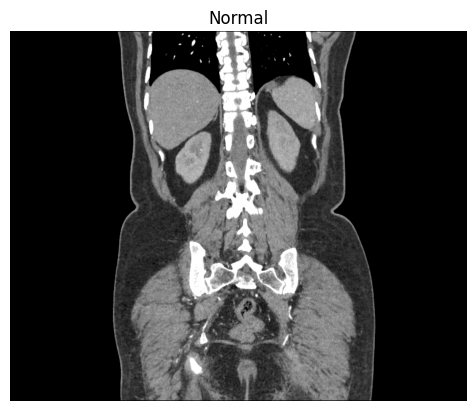

In [27]:
img = random_images(class_name[1])

### Let's get tp Feature augmentation

Here we will be testing out a Image/Data/Feature Augmentation with  **keras.experimental.preprocessing** layers & **ImagaDataGenerator**

In [41]:
from keras.layers.experimental import preprocessing
from keras.models import Sequential
import tensorflow as tf


#SETUP DATA INPUT
DIRECTORY = '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
IMG_SIZE = (300,300)

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    DIRECTORY,
    label_mode = 'categorical',
    image_size = IMG_SIZE,
    validation_split= 0.1,
    subset = 'training',
    seed= 42
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    DIRECTORY,
    label_mode = 'categorical',
    image_size = IMG_SIZE,
    validation_split= 0.2,
    subset = 'validation',
    seed = 42
)

Found 12446 files belonging to 4 classes.
Using 11202 files for training.
Found 12446 files belonging to 4 classes.
Using 2489 files for validation.


In [42]:
data_augmentation = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
     #Skippable for anything not efficientnet [preprocessing.Rescaling(1/255.)]
])

## Time for some Transfer Learning🏫

Here we will be using **EfficientNETB0**

In [47]:
from keras.src.layers.pooling.global_max_pooling2d import GlobalMaxPooling2D
from keras import layers
# Setup the base model

base_model = tf.keras.applications.EfficientNetB0(include_top = False)

base_model.trainable = False

# SETUP INPUTS
inputs = layers.Input( shape = (300,300,3), name = 'input_layer')
x = data_augmentation(inputs)
x = base_model(x, training= False)
x = layers.GlobalAveragePooling2D(name = 'global_avg_pooling')(x)

outputs = layers.Dense(len(train_data.class_names), activation = 'softmax')(x)

model1 = tf.keras.Model(inputs, outputs)

In [48]:
model1.compile(
    loss = "categorical_crossentropy",
    metrics = ['accuracy'],
    optimizer = tf.keras.optimizers.Adam()
)

In [49]:
history1 = model1.fit(
    train_data,
    epochs = 5,
    validation_data = test_data,
    validation_steps= int(0.15 * len(test_data))
)

Epoch 1/5
351/351 [==============================] - 115s 303ms/step - loss: 0.6749 - accuracy: 0.7630 - val_loss: 0.8080 - val_accuracy: 0.6761
Epoch 2/5
351/351 [==============================] - 99s 280ms/step - loss: 0.4273 - accuracy: 0.8544 - val_loss: 0.7738 - val_accuracy: 0.6847
Epoch 3/5
351/351 [==============================] - 98s 277ms/step - loss: 0.3400 - accuracy: 0.8893 - val_loss: 0.5407 - val_accuracy: 0.7955
Epoch 4/5
351/351 [==============================] - 91s 256ms/step - loss: 0.2970 - accuracy: 0.9061 - val_loss: 0.5844 - val_accuracy: 0.7614
Epoch 5/5
351/351 [==============================] - 87s 246ms/step - loss: 0.2668 - accuracy: 0.9138 - val_loss: 0.5118 - val_accuracy: 0.7756


In [50]:
model1.evaluate(test_data)

78/78 [==============================] - 12s 140ms/step - loss: 0.5161 - accuracy: 0.7959


[0.5160505175590515, 0.7959019541740417]

## Fine tuning

Create a topless model

In [51]:

base_model.trainable = True


# Refreeze every layer except the last 5

for layer in base_model.layers[:-10]:
  layer.trainable = False

In [52]:
model1.compile(
    loss = "categorical_crossentropy",
    metrics = ['accuracy'],
    optimizer = tf.keras.optimizers.Adam(0.0001)
)

In [53]:
history2 = model1.fit(
    train_data,
    epochs = 5,
    validation_data = test_data,
    validation_steps= int(0.15 * len(test_data))
)

Epoch 1/5
351/351 [==============================] - 103s 257ms/step - loss: 0.1922 - accuracy: 0.9309 - val_loss: 0.3372 - val_accuracy: 0.8494
Epoch 2/5
351/351 [==============================] - 86s 244ms/step - loss: 0.1204 - accuracy: 0.9599 - val_loss: 0.4077 - val_accuracy: 0.8381
Epoch 3/5
351/351 [==============================] - 79s 222ms/step - loss: 0.0815 - accuracy: 0.9734 - val_loss: 0.2047 - val_accuracy: 0.9205
Epoch 4/5
351/351 [==============================] - 80s 225ms/step - loss: 0.0662 - accuracy: 0.9792 - val_loss: 0.3612 - val_accuracy: 0.8608
Epoch 5/5
351/351 [==============================] - 79s 224ms/step - loss: 0.0562 - accuracy: 0.9835 - val_loss: 0.3267 - val_accuracy: 0.8722


In [54]:
model1.evaluate(test_data)

78/78 [==============================] - 13s 154ms/step - loss: 0.3741 - accuracy: 0.8654


[0.37414824962615967, 0.8654077649116516]

In [55]:
train_data.class_names

['Cyst', 'Normal', 'Stone', 'Tumor']

In [56]:
model1.save('kidney.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
